Jakov Rukavina

# Projekt

Implementacija članka "Implementation of Machine Learning Model to Predict Heart Failure Disease" u sklopu projekta na predmetu Uvod u znanost o podacima.

Članak je dostupan na linku: https://pdfs.semanticscholar.org/a74f/d8c51251e8c6126a1527e545bd78860a10f9.pdf


## Vrsta istraživanja u članku

Istraživanje možemo klasificirati prema:
 - svrsi: primijenjeno istraživanje - u članku se koriste već postojeće i dobro poznate metode kako bi se poboljšali rezultati prijašnjih istraživanja na ovu temu
 - dubini: istraživačko (exploratory) istraživanje - članak se fokusira na obradu javno dostupnih medicinskih podataka kako bi se objasnila veza između određenih značajki (koje opisuju stanje pacijenta) te zatajenja srca
 - vrsti korištenih podataka: kvantitativno istraživanje - većina podataka u korištenom skupu dobivena su medicinskim mjerenjima
 - stupnju manipulacije varijablama: promatračko istraživanje - varijable se ne mijenjaju već se koriste one koje su dobivene mjerenjem (promatranjem)
 - vrsti zaključka: induktivno istraživanje - znanje se generira zaključivanjem radi postizanja generalizacije
 - vremenu provedbe: studija presjeka - promatraju se trenutna stanja skupine pacijenata
 - izvoru informacija: sekundarno istraživanje - istraživači nisu sami prikupili podatke već su koristi javno dostupan skup
 - načinu prikupljanja podataka: laboratorijsko istraživanje - uspostavlja se odnos bolesti zatajenja srca i drugih značajki


## Importi biblioteka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

## Podaci

### Pregled podataka



Skup podataka korišten u članku sastoji se od 13 značajki i jedne oznake. Ukupno sadrži 303 opservacije odnosno očitanja stanja pacijenata te je dostupan na https://www.kaggle.com/ronitf/heart-disease-uci.

Orginalni skup podataka sadrži 76 značajki no iz njega su izbačeni razni podaci poput onih privatnih (ime pacijenta itd.). 

Opis značajki u skupu podataka:
    
 - age: The person’s age in years
 - sex: The person’s sex (1 = male, 0 = female)
 - cp: chest pain type
        — Value 0: asymptomatic
        — Value 1: atypical angina
        — Value 2: non-anginal pain
        — Value 3: typical angina
 - trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
 - chol: The person’s cholesterol measurement in mg/dl
 - fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
 - restecg: resting electrocardiographic results
        — Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
        — Value 1: normal
        — Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - thalach: The person’s maximum heart rate achieved
 - exang: Exercise induced angina (1 = yes; 0 = no)
 - oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)
 - slope: the slope of the peak exercise ST segment
        — Value 0: downsloping
        — Value 1: flat
        — Value 2: upsloping
 - ca: The number of major vessels (0–3)
 - thal: A blood disorder called thalassemia
        — Value 0: NULL (dropped from the dataset previously
        — Value 1: fixed defect (no blood flow in some part of the heart)
        — Value 2: normal blood flow
        — Value 3: reversible defect (a blood flow is observed but it is not normal)
 - target: Heart disease (1 = yes, 0 = no)

Učitavanje .csv filea

In [2]:
file = 'data/heart_cleveland.csv'
# file = 'data/heart.csv'
df = pd.read_csv(file)


Prvi pregled podataka

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Pregled kategoričkih podataka.

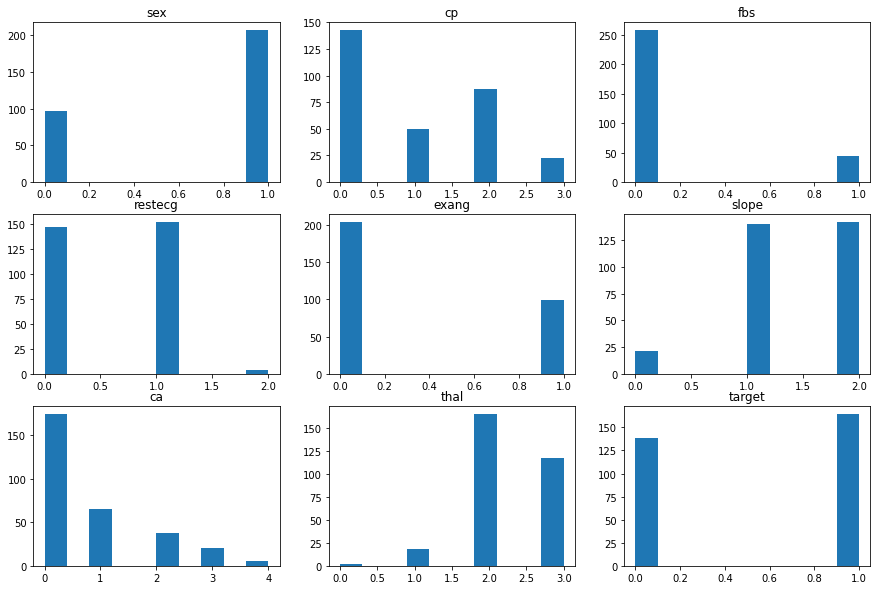

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

ax[0, 0].hist(df.sex)
ax[0, 0].title.set_text('sex')

ax[0, 1].hist(df.cp)
ax[0, 1].title.set_text('cp')

ax[0, 2].hist(df.fbs)
ax[0, 2].title.set_text('fbs')

ax[1, 0].hist(df.restecg)
ax[1, 0].title.set_text('restecg')

ax[1, 1].hist(df.exang)
ax[1, 1].title.set_text('exang')

ax[1, 2].hist(df.slope)
ax[1, 2].title.set_text('slope')

ax[2, 0].hist(df.ca)
ax[2, 0].title.set_text('ca')

ax[2, 1].hist(df.thal)
ax[2, 1].title.set_text('thal')

ax[2, 2].hist(df.target)
ax[2, 2].title.set_text('target')

plt.show()

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Outliers - stršeći podaci

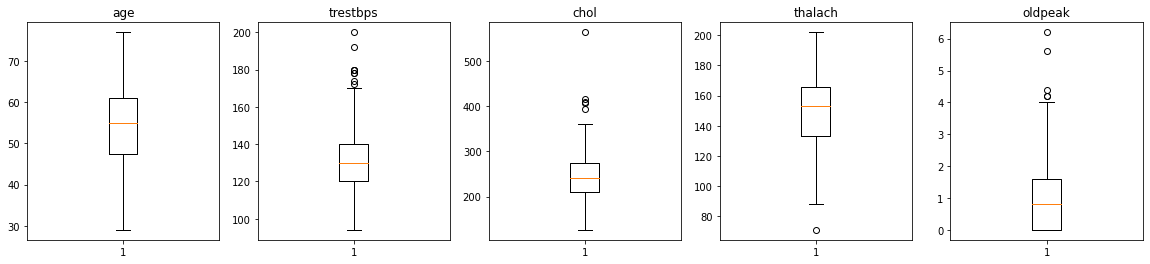

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(20,4))

ax[0].boxplot(df.age)
ax[0].title.set_text('age')

ax[1].boxplot(df.trestbps)
ax[1].title.set_text('trestbps')

ax[2].boxplot(df.chol)
ax[2].title.set_text('chol')

ax[3].boxplot(df.thalach)
ax[3].title.set_text('thalach')

ax[4].boxplot(df.oldpeak)
ax[4].title.set_text('oldpeak')

plt.show()

In [8]:
print(df.loc[df.oldpeak > 5]['oldpeak'].count())
print(df.loc[df.chol > 500]['chol'].count())


2
1


Izbacivanje stršećih podataka

In [9]:
print(len(df))

df = df.loc[df.chol <= 500]
df = df.loc[df.oldpeak <= 5]

print(len(df))

303
300


Izbacivanje duplikata

In [10]:
print(len(df))

df.drop_duplicates(inplace=True)

print(len(df))

300
299


### Važnost pojedinih značajki

<AxesSubplot:>

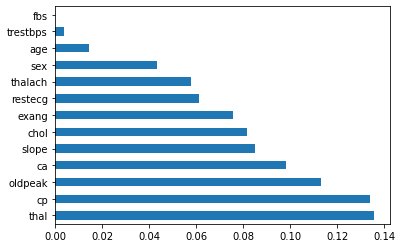

In [11]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.filter(regex='^(?!target$).*')
y = df['target']

kbest = SelectKBest(mutual_info_classif, k=13)
kbest.fit(X, y)

feat_importances = pd.Series(kbest.scores_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')


Vizualizacija utjecaja najbitnijih značajki na zatajenje srca.

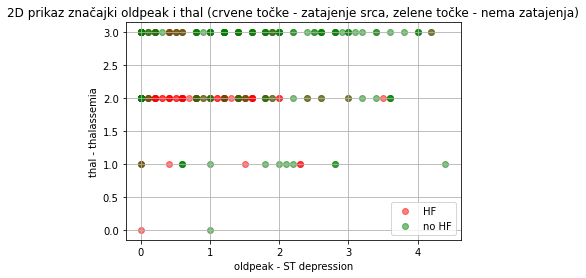

In [12]:
# mask
mask_hf = df.target == 1

# plot
plt.scatter(df.loc[mask_hf,'oldpeak'], df.loc[mask_hf,'thal'], alpha=0.5, c='r', label='HF')
plt.scatter(df.loc[~mask_hf,'oldpeak'], df.loc[~mask_hf,'thal'], alpha=0.5, c='g', label='no HF')
plt.xlabel('oldpeak - ST depression')
plt.ylabel('thal - thalassemia')
plt.title('2D prikaz značajki oldpeak i thal (crvene točke - zatajenje srca, zelene točke - nema zatajenja)')
plt.grid()
plt.legend(loc='best')
plt.show()

Još jedan par zanimljivih značajki

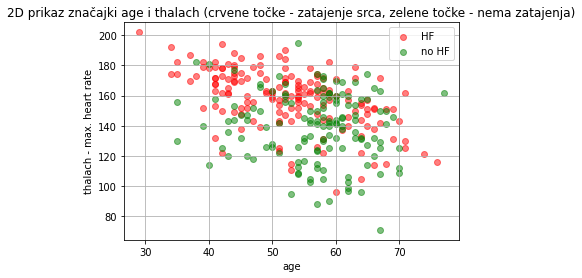

In [13]:
# mask
mask_hf = df.target == 1

# plot
plt.scatter(df.loc[mask_hf,'age'], df.loc[mask_hf,'thalach'], alpha=0.5, c='r', label='HF')
plt.scatter(df.loc[~mask_hf,'age'], df.loc[~mask_hf,'thalach'], alpha=0.5, c='g', label='no HF')
plt.xlabel('age')
plt.ylabel('thalach - max. heart rate')
plt.title('2D prikaz značajki age i thalach (crvene točke - zatajenje srca, zelene točke - nema zatajenja)')
plt.grid()
plt.legend(loc='best')
plt.show()

### Korelacija značajki

Iz grafa se vidi da nema značajki koje su u visokoj korelacije stoga ne treba izbacivati značajke po ovoj osnovi.

<AxesSubplot:>

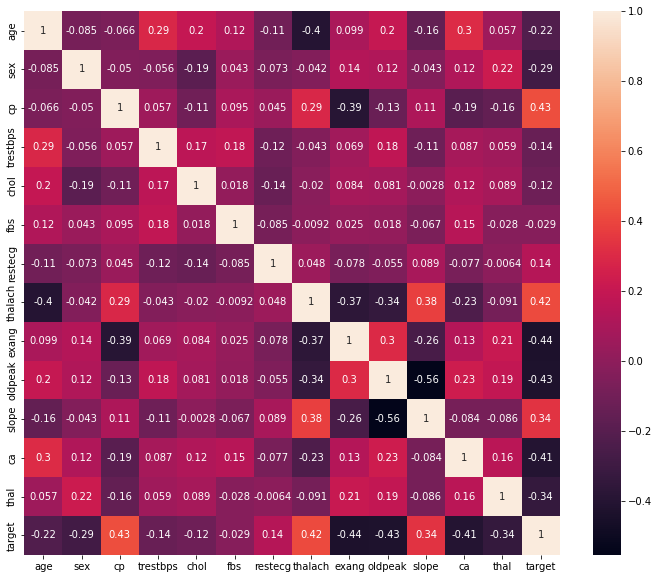

In [14]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

### Odvajanje skupova podataka

Korak koji je u članku napravljen u krivom redosljedu

In [15]:
from sklearn import preprocessing, model_selection

df_train, df_test = model_selection.train_test_split(df, test_size=0.3, random_state=42)

### Stvaranje sintetičkih podataka

In [16]:
#from sklearn.neighbors import KernelDensity
#kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(df)
#synthetic = pd.DataFrame(kde.sample(samples))


def synthesize_data(samples: int, exisitngData: pd.DataFrame):
    
    new = []
    
    for i in range(samples):
        
        original = exisitngData.iloc[random.randint(0, len(exisitngData) - 1)].copy()
        #print(original)
        original['age'] += random.gauss(mu=0.0, sigma=(original['age'] / 50))
        original['trestbps'] += random.gauss(mu=0.0, sigma=(original['trestbps'] / 50))
        original['chol'] += random.gauss(mu=0.0, sigma=(original['chol'] / 50))
        original['thalach'] += random.gauss(mu=0.0, sigma=(original['thalach'] / 50))
        original['oldpeak'] += random.gauss(mu=0.0, sigma=(original['oldpeak'] / 50))
        #print(original)
        new.append(original)
    
    new = pd.DataFrame(new)
    
    new.age = np.round(new.age).astype(int) 
    new.sex = np.round(new.sex).astype(int) 
    new.cp = np.round(new.cp).astype(int) 
    new.trestbps = np.round(new.trestbps).astype(int) 
    new.chol = np.round(new.chol).astype(int) 
    new.fbs = np.round(new.fbs).astype(int) 
    new.restecg = np.round(new.restecg).astype(int) 
    new.thalach = np.round(new.thalach).astype(int) 
    new.exang = np.round(new.exang).astype(int) 
    new.oldpeak = np.round(new.oldpeak, 1)
    new.slope = np.round(new.slope).astype(int) 
    new.ca = np.round(new.ca).astype(int) 
    new.thal = np.round(new.thal).astype(int) 
    new.target = np.round(new.target).astype(int) 
    
    #new.drop(columns=['Id'])
    return new


In [17]:
df_synthetic = synthesize_data(800, df_train)
df_train_new = pd.merge(df_synthetic, df_train, how='outer')

Ponovo izbacivanje duplikata za svaki slučaj

In [18]:
print(len(df_train_new))

df_train_new.drop_duplicates(inplace=True)

print(len(df_train_new))

1008
1008


### Pretvorba kategoričkih značajki u binarne

Kategorije značajki 'cp', 'restecg', 'slope' i 'thal' nemaju poredak pa ih pretvaramo u binarne uz one-hot encoding.

In [19]:
df_train_new = pd.get_dummies(df_train_new, columns=['cp', 'restecg', 'slope', 'thal'])
df_test = pd.get_dummies(df_test, columns=['cp', 'restecg', 'slope', 'thal'])

df_train_new.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


### Odvajanje i skaliranje podataka

In [20]:
X_train = df_train_new.filter(regex='^(?!target$).*')
y_train = df_train_new['target']

X_test = df_test.filter(regex='^(?!target$).*')
y_test = df_test['target']

In [21]:
X_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,1,118,188,0,188,0,0.0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,57,1,112,314,0,138,0,4.4,3,1,...,0,0,1,1,0,0,0,1,0,0
2,56,0,145,233,0,118,1,0.2,0,1,...,0,1,0,0,1,0,0,0,0,1
3,53,1,124,255,0,160,1,0.0,1,1,...,0,1,0,0,0,1,0,0,0,1
4,57,1,133,226,0,179,0,3.2,2,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,51,0,130,305,0,142,1,1.2,0,1,...,0,1,0,0,1,0,0,0,0,1
1004,51,1,94,227,0,154,1,0.0,1,0,...,0,1,0,0,0,1,0,0,0,1
1005,45,0,138,236,0,152,1,0.2,0,1,...,1,0,0,0,1,0,0,0,1,0
1006,47,1,110,275,0,118,1,1.0,1,1,...,1,0,0,0,1,0,0,0,1,0


In [22]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

Skaliranje i odvajanje na skup za treniranje i testiranje.

In [23]:
# fittanje scalera samo sa stvarnim podacima sa train skupa
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.248234,0.630919,-0.751261,-1.081990,-0.418121,1.611401,-0.666428,-0.901276,-0.747415,-0.962986,...,1.005970,-0.988165,-0.094916,-0.281477,1.104656,-0.953463,-0.054636,3.718001,-1.087115,-0.796060
1,0.309297,0.630919,-1.120751,1.362447,-0.418121,-0.508421,-0.666428,3.133588,2.139155,1.038437,...,-0.994065,-0.988165,10.535654,3.552692,-0.905259,-0.953463,-0.054636,3.718001,-1.087115,-0.796060
2,0.197791,-1.584991,0.911447,-0.208977,-0.418121,-1.356350,1.500538,-0.717873,-0.747415,1.038437,...,-0.994065,1.011976,-0.094916,-0.281477,1.104656,-0.953463,-0.054636,-0.268962,-1.087115,1.256187
3,-0.136728,0.630919,-0.381770,0.217830,-0.418121,0.424301,1.500538,-0.901276,0.214775,1.038437,...,-0.994065,1.011976,-0.094916,-0.281477,-0.905259,1.048809,-0.054636,-0.268962,-1.087115,1.256187
4,0.309297,0.630919,0.172466,-0.344779,-0.418121,1.229833,-0.666428,2.033171,1.176965,-0.962986,...,1.005970,-0.988165,-0.094916,-0.281477,-0.905259,1.048809,-0.054636,-0.268962,-1.087115,1.256187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,-0.359740,-1.584991,-0.012280,1.187845,-0.418121,-0.338835,1.500538,0.199141,-0.747415,1.038437,...,-0.994065,1.011976,-0.094916,-0.281477,1.104656,-0.953463,-0.054636,-0.268962,-1.087115,1.256187
1004,-0.359740,0.630919,-2.229223,-0.325378,-0.418121,0.169922,1.500538,-0.901276,0.214775,-0.962986,...,-0.994065,1.011976,-0.094916,-0.281477,-0.905259,1.048809,-0.054636,-0.268962,-1.087115,1.256187
1005,-1.028777,-1.584991,0.480374,-0.150776,-0.418121,0.085129,1.500538,-0.717873,-0.747415,1.038437,...,1.005970,-0.988165,-0.094916,-0.281477,1.104656,-0.953463,-0.054636,-0.268962,0.919866,-0.796060
1006,-0.805765,0.630919,-1.243915,0.605836,-0.418121,-1.356350,1.500538,0.015738,0.214775,1.038437,...,1.005970,-0.988165,-0.094916,-0.281477,1.104656,-0.953463,-0.054636,-0.268962,0.919866,-0.796060


Selekcija značajki nije dala mjerljivo povećanje točnosti ili smanjenje vremena izvedbe pa taj kod ostaje zakomentiran.

In [24]:
#kbest = SelectKBest(mutual_info_classif, k=15)
#kbest.fit(X_train, y_train)
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

#X_train_ = X_train[X_train.columns[kbest.get_support()]]
#X_test_ = X_test[X_test.columns[kbest.get_support()]]

Funkcija za evaluaciju modela.

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def show_metrics(y_true, y_pred, rich=True):
    print('Accuracy: {:.2f}%\n'.format(accuracy_score(y_true, y_pred) * 100))
    
    if rich:
        print(classification_report(y_true, y_pred))
    
        #sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
        ax= plt.subplot()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues', ax=ax);
    
        ax.set_xlabel('Predicted labels');
        ax.set_ylabel('True labels');  
        ax.xaxis.set_ticklabels(['no HD', 'HD']);
        ax.yaxis.set_ticklabels(['no HD', 'HD']);
    

Funkcija za k-fold evaluaciju.

In [26]:
from sklearn.model_selection import KFold

def kfold_eval(model, X, y, k=10):
    
    kf = KFold(n_splits=k, shuffle=True)
 
    acc_score = []
 
    for train_index, test_index in kf.split(X):
        X_train , X_test = X[train_index], X[test_index]
        y_train , y_test = y[train_index], y[test_index]
     
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
     
        acc = accuracy_score(y_test, y_pred)
        acc_score.append(acc)
     
    avg_acc_score = sum(acc_score)/k
 
    # print('accuracy of each fold - {}'.format(acc_score))
    print('{}-fold avg accuracy: {:.2f}%'.format(k, avg_acc_score * 100))

### Zaključak

Rekreiranjem postupaka iz članka dobio sam slijedeće rezultate:
 - Stabla odluke -> dobivena točnost oko 96%, točnost iz članka 93.19%
 - Naivna Bayesova klasifikacija -> dobivena točnost oko 84%, točnost iz članka 87.27%
 - Random Forest -> dobivena točnost oko 98%, točnost iz članka 89.14%
 - Logistička regresija -> dobivena točnost oko 86.5%, točnost iz članka 87.36%
 - SVM (C=1) -> dobivena točnost oko 93%, točnost iz članka 92.30%
 - SVM (C=10) -> dobivena točnost oko 98%, točnost iz članka 92.30%

Razultati više-manje odgovaraju rezultatima iz članka osim u slučajevima sa Random Forest klasifikatorom i SVM klasifikatorom uz konstantu C=10 gdje u oba slučajeva dobivam poprilično veću točnost.

Sumnjam na to kako se točnost korištenih modela u članku pogrešno evaluirala ako je dataset podijeljen na train i test tek nakon stvaranja sintetičkih podataka. Ovo bi značilo da su podaci iz podskupa za testiranje također utjecali i na primjere iz podskupa za treniranje te to potencijalno objašnjava poprilično veću postignutu točnost u odnosu na prijašnje članke koji su koristili isti dataset.

Smatram kako bi rješenje ovoga problema bilo uključiti cijeli Heart Failure Prediction Dataset koji ukupno uključuje 918 primjera te odmah na početku podijeliti dataset na skup za učenje i skup za treniranje. Nakon te podjele mogu se SAMO od primjera za treniranje napraviti dodatni sintetički podaci kako oni ne bi "sličili" na testne primjere.

# Proširenje projekta

## Učenje i predikcija - baseline

Budući da su u članku podaci za učenje utjecali na one za testiranje treba napraviti novi baseline kako bi znali koji rezultat pokušavamo nadmašiti.

### Stabla odluke

Accuracy: 76.67%

              precision    recall  f1-score   support

           0       0.75      0.65      0.70        37
           1       0.78      0.85      0.81        53

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90



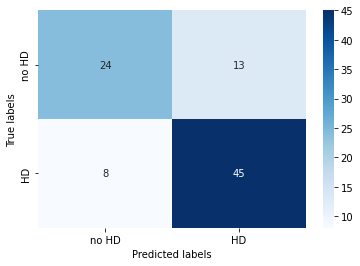

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
y_pred = tree_model.predict(X_test_scaled)

show_metrics(y_test, y_pred)

### Naivna Bayesova klasifikacija

Accuracy: 61.11%

              precision    recall  f1-score   support

           0       0.51      0.97      0.67        37
           1       0.95      0.36      0.52        53

    accuracy                           0.61        90
   macro avg       0.73      0.67      0.60        90
weighted avg       0.77      0.61      0.58        90



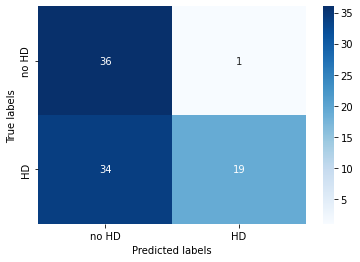

In [28]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred = nb_model.predict(X_test_scaled)

show_metrics(y_test, y_pred)

### Random Forest

Accuracy: 82.22%

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        37
           1       0.85      0.85      0.85        53

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



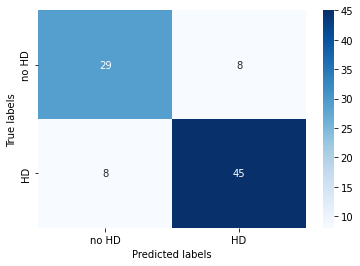

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

show_metrics(y_test, y_pred)

### Logistička regresija

Accuracy: 84.44%

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        37
           1       0.84      0.91      0.87        53

    accuracy                           0.84        90
   macro avg       0.85      0.83      0.84        90
weighted avg       0.84      0.84      0.84        90



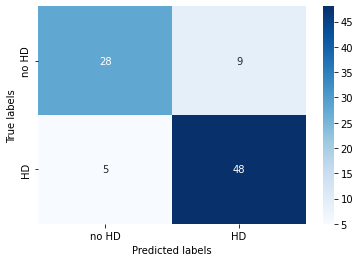

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)

show_metrics(y_test, y_pred)

### SVM

Accuracy: 83.33%

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        37
           1       0.83      0.91      0.86        53

    accuracy                           0.83        90
   macro avg       0.84      0.82      0.82        90
weighted avg       0.83      0.83      0.83        90



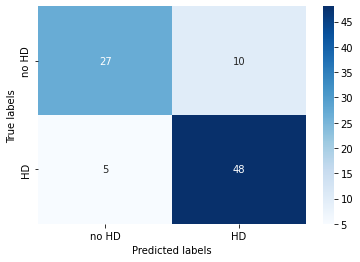

In [31]:
from sklearn.svm import SVC

svm_model = SVC(C=1)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

show_metrics(y_test, y_pred)

SVM uz C=10 (konstantu koja utječe na regularizaciju; veća vrijednost -> manja regularizacija)

Accuracy: 78.89%

              precision    recall  f1-score   support

           0       0.80      0.65      0.72        37
           1       0.78      0.89      0.83        53

    accuracy                           0.79        90
   macro avg       0.79      0.77      0.77        90
weighted avg       0.79      0.79      0.78        90



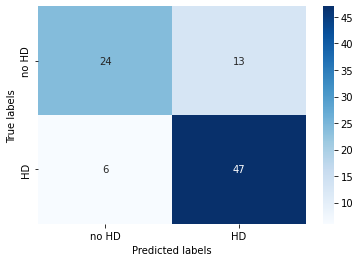

In [32]:
svm_model = SVC(C=10)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

show_metrics(y_test, y_pred)

Novi rezultati sličniji su rezultatima dobivenim u prijašnjim člancima s kojima se ovaj članak uspoređuje. Sada dobivamo mnogo manju točnost nego prije što potvrđuje prijašnje sumnje da je evaluacija bila pogrešno izvedena.


### Novi skup podataka

Točnost možemo poboljšati sa više podataka. Na sreću dostupan je veći skup podataka sastavljen od 5 podskupova od kojih je jedan i onaj koji je korišten u članku (prikupljen u bolnici u Clevelandu).

Novi skup sadrži 11 značajki, 2 manje nego originalan skup, te opet jedne oznake koja označava srčanu bolest tj opasnost od zatajenja srca.
Ukupno sadrži 918 očitanja stanja pacijenata te je dostupan na https://www.kaggle.com/fedesoriano/heart-failure-prediction.

In [33]:
file = 'data/heart.csv'
df = pd.read_csv(file)

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Poboljšanje skupa podataka

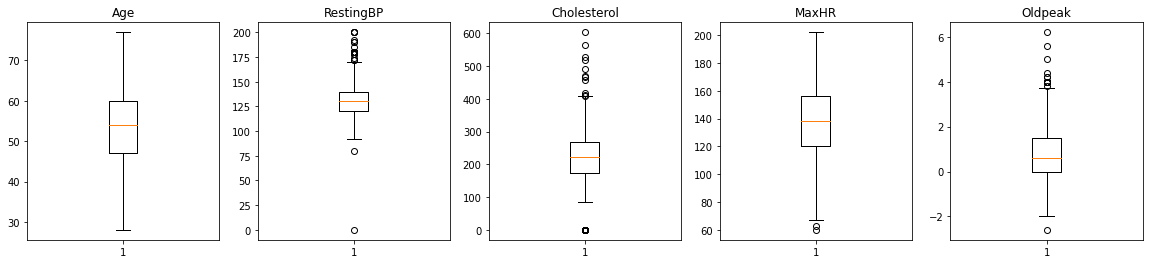

In [34]:
fig, ax = plt.subplots(1, 5, figsize=(20,4))

ax[0].boxplot(df.Age)
ax[0].title.set_text('Age')

ax[1].boxplot(df.RestingBP)
ax[1].title.set_text('RestingBP')

ax[2].boxplot(df.Cholesterol)
ax[2].title.set_text('Cholesterol')

ax[3].boxplot(df.MaxHR)
ax[3].title.set_text('MaxHR')

ax[4].boxplot(df.Oldpeak)
ax[4].title.set_text('Oldpeak')

plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
df["Sex"] = lab_enc.fit_transform(df["Sex"])
df["FastingBS"] = lab_enc.fit_transform(df["FastingBS"])
df["ExerciseAngina"] = lab_enc.fit_transform(df["ExerciseAngina"])

In [36]:
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

df.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [37]:
print(df.loc[df.RestingBP == 0]['RestingBP'].count())
print(df.loc[df.Cholesterol == 0]['Cholesterol'].count())
# print(df.loc[df.Oldpeak >= 5]['Oldpeak'].count())

1
172


In [38]:
#df.loc[df.RestingBP == 0, 'RestingBP'] = np.nan
#df.loc[df.Cholesterol == 0, 'Cholesterol'] = np.nan

#df.isna().sum()

In [39]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer

#imputer = KNNImputer(weights='distance', n_neighbors=13)
#imputer = IterativeImputer(max_iter=500, sample_posterior=True, skip_complete=True)
#imputer = SimpleImputer()
#imputed_data = imputer.fit_transform(df)

#df_temp = pd.DataFrame(imputed_data)
#df_temp.columns = df.columns
#df = df_temp

#df.isna().sum()

Zamjena nedostajećih vrijednosti u ovom slučaju ne pomaže povećati točnost tako da ostavljam vrijednosti takve kakve jesu.

Dodatno ćemo izbaciti nekoliko primjera sa stršećim vrijednostima.

In [40]:
df = df.loc[df.RestingBP > 0]
df = df.loc[df.Oldpeak <= 5]

Odavajanje podataka na skup za treniranje i skup za testiranje.

Tek se nakon ovog koraka mogu stvoriti sintetički podaci i to samo od skupa za treniranje.

In [41]:
for column in df.columns:
        df[column] = df[column].astype(float)

df_train, df_test = model_selection.train_test_split(df, test_size=0.3, random_state=42)

In [42]:
def synthesize_data(samples: int, exisitngData: pd.DataFrame, var=0.02):
    new = []
    numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    
    for i in range(samples):
        original = exisitngData.iloc[random.randint(0, len(exisitngData) - 1)].copy()
        for column in numeric:
            original[column] += random.gauss(mu=0.0, sigma=(original[column] * var))

        new.append(original)
    
    new = pd.DataFrame(new)
    for column in new.columns:
        new[column] = new[column].astype(float) 
    
    #new.drop(columns=['Id'])
    return new

Stvaranje sintetičkih podataka, otprilike u omjeru 1:1 sa originalnim podacima.

In [43]:
df_synthetic = synthesize_data(800, df_train, var=0.1)
df_train_new = df_train
df_train_new = pd.merge(df_synthetic, df_train, how='outer')

In [44]:
X_train = df_train_new.filter(regex='^(?!HeartDisease$).*')
y_train = df_train_new['HeartDisease']

X_test = df_test.filter(regex='^(?!HeartDisease$).*')
y_test = df_test['HeartDisease']

In [45]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

Skaliranje podataka.

In [46]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Funkcija za evaluaciju.

In [47]:
def eval(X_train, y_train, X_test, y_test, rich=False):
    models = [DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(), LogisticRegression(solver='liblinear'), SVC(C=0.75)]
    messages = ['Stabla odluke:', 'Naivna Bayesova klasifikacija:', 'Random Forest:', 'Logistička regresija:', 'Stroj potpornih vektora:']
    
    for model, mess in zip(models, messages):
        print(mess)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        show_metrics(y_test, y_pred, rich=rich)
        plt.show()
    

In [48]:
eval(X_train_scaled, y_train, X_test_scaled, y_test)

Stabla odluke:
Accuracy: 81.45%

Naivna Bayesova klasifikacija:
Accuracy: 88.00%

Random Forest:
Accuracy: 88.73%

Logistička regresija:
Accuracy: 89.09%

Stroj potpornih vektora:
Accuracy: 89.82%



Razultat se može još malo poboljšati stvaranjem interakcijskih značajki i biranjem onih najbitnijih.

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

scaler = preprocessing.StandardScaler().fit(X_train_poly)
X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

kbest = SelectKBest(mutual_info_classif, k=80)
kbest.fit(X_train_poly, y_train)

mask = kbest.get_support()
X_train_reduced = X_train_poly[:,mask]
X_test_reduced = X_test_poly[:,mask]

Stabla odluke:
Accuracy: 85.82%

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       109
         1.0       0.89      0.87      0.88       166

    accuracy                           0.86       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.86      0.86      0.86       275



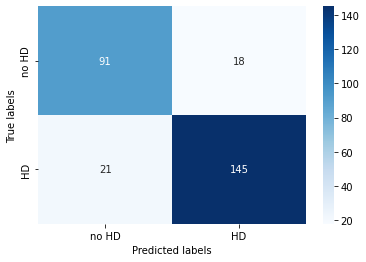

Naivna Bayesova klasifikacija:
Accuracy: 84.00%

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.82       109
         1.0       0.92      0.81      0.86       166

    accuracy                           0.84       275
   macro avg       0.83      0.85      0.84       275
weighted avg       0.85      0.84      0.84       275



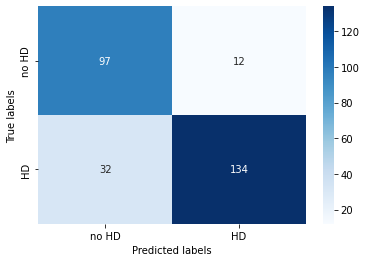

Random Forest:
Accuracy: 86.55%

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84       109
         1.0       0.91      0.87      0.89       166

    accuracy                           0.87       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.87      0.87      0.87       275



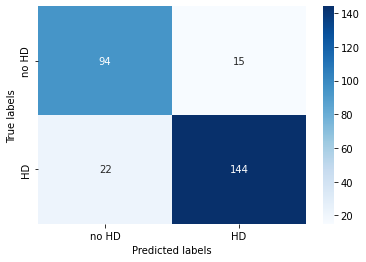

Logistička regresija:
Accuracy: 90.55%

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       109
         1.0       0.93      0.91      0.92       166

    accuracy                           0.91       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.91      0.91      0.91       275



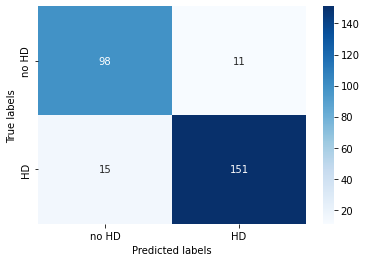

Stroj potpornih vektora:
Accuracy: 90.91%

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       109
         1.0       0.92      0.93      0.92       166

    accuracy                           0.91       275
   macro avg       0.91      0.90      0.90       275
weighted avg       0.91      0.91      0.91       275



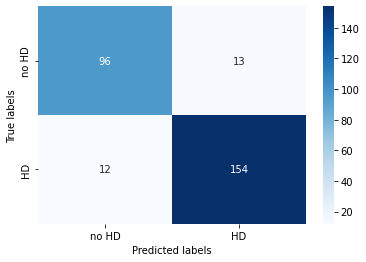

In [50]:
eval(X_train_reduced, y_train, X_test_reduced, y_test, rich=True)

### Isprobavanje dodatnih klasifikacijskih modela

Isprobavanjem još nekoliko drugih klasifikatora nisam dobio bolje rezultate.

In [51]:
from sklearn.gaussian_process import GaussianProcessClassifier

gauss_model = GaussianProcessClassifier()
gauss_model.fit(X_train_scaled, y_train)
y_pred = gauss_model.predict(X_test_scaled)

show_metrics(y_test, y_pred, rich=False)

Accuracy: 85.09%



In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

show_metrics(y_test, y_pred, rich=False)

Accuracy: 81.82%



In [53]:
from sklearn.neural_network import MLPClassifier

neural_net_model = MLPClassifier(hidden_layer_sizes=(256), learning_rate='adaptive', max_iter=500)
neural_net_model.fit(X_train_scaled, y_train)
y_pred = neural_net_model.predict(X_test_scaled)

show_metrics(y_test, y_pred, rich=False)

Accuracy: 86.55%



/home/jakov/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(learning_rate=0.05)
ada_model.fit(X_train_scaled, y_train)
y_pred = ada_model.predict(X_test_scaled)

show_metrics(y_test, y_pred, rich=False)

Accuracy: 87.27%



In [55]:
from sklearn.svm import NuSVC

nusvc_model = NuSVC()
nusvc_model.fit(X_train_scaled, y_train)
y_pred = nusvc_model.predict(X_test_scaled)

show_metrics(y_test, y_pred, rich=False)

Accuracy: 90.18%



### Novi zaključak

Točnost za baseline implementaciju iznosi između 60% i 83% ovisno o klasifikatoru te odgovara rezultatima prijašnjih članaka.

Korištenjem mnogo većeg skupa podataka koji sadrži otprilike 3 puta više podataka nego originalni skup uspio sam uvelike povećati točnost predviđanja. Došao sam do zaključka kako ne treba pretjerati sa količinom sintetičkih podataka pa sam smanjio omjer sintetičkih i stvarnih podataka sa otprilike 3:1 na 1:1 te tako malo povećao točnost nekih modela. Točnost sam uvelike uspio povećati i stvaranjem interakcijskih značajki te biranjem samo najvažnijih značajki za proces treniranja.

Na kraju sam isprobao i nekoliko drugih klasifikacijskih modela implementiranih u biblioteci Scikit-learn no oni nisu rezultirali povećanju točnosti u odnosu na originalno korištene modele.

Konačna najbolja točnost koju sam dobio iznosi oko 91% što je za 8 postotnih bodova više od prijašnjeg najboljeg rezultata te su rezultati svih 5 modela puno stabilniji.